In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
import pandas as pd
from pandas import DataFrame, Series
%matplotlib inline

## Import data

In [3]:
consumer_complaints = pd.read_csv('complaints_dec_2014.csv')
consumer_complaints.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
3,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
4,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN


In [4]:
consumer_complaints['Product'].unique()

array(['Debt collection', 'Credit card', 'Bank account or service',
       'Credit reporting', 'Mortgage', 'Money transfers', 'Consumer loan',
       'Student loan', 'Payday loan', 'Prepaid card',
       'Other financial service'], dtype=object)

In [5]:
consumer_complaints.Product.count()

11543

## Number of complaints by product

In [6]:
consumer_complaints.Product.value_counts()


Mortgage                   3002
Debt collection            2942
Credit reporting           2113
Bank account or service    1136
Credit card                1100
Consumer loan               578
Student loan                340
Payday loan                 141
Money transfers             107
Prepaid card                 70
Other financial service      14
Name: Product, dtype: int64

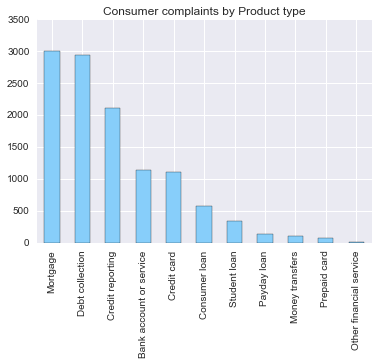

In [7]:
consumer_complaints.Product.value_counts().plot(kind='bar', color ='lightskyblue',title ="Consumer complaints by Product type")

In [8]:
consumer_complaints.Product.value_counts()

Mortgage                   3002
Debt collection            2942
Credit reporting           2113
Bank account or service    1136
Credit card                1100
Consumer loan               578
Student loan                340
Payday loan                 141
Money transfers             107
Prepaid card                 70
Other financial service      14
Name: Product, dtype: int64

## Number of complaints by company (top 10 companies only)

In [9]:
consumer_complaints.Company.value_counts().head(10)

Bank of America        766
Equifax                737
Experian               675
TransUnion             604
Wells Fargo            598
JPMorgan Chase         545
Ocwen                  408
Citibank               403
Nationstar Mortgage    357
Capital One            252
Name: Company, dtype: int64

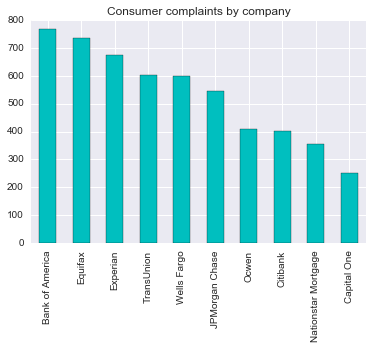

In [10]:
consumer_complaints.Company.value_counts().head(10).plot(kind='bar',color='c',title="Consumer complaints by company")

## Number of complaints by company response

In [11]:
consumer_complaints['Company response'].value_counts()

Closed with explanation            8185
Closed with non-monetary relief    1253
In progress                        1056
Closed with monetary relief         643
Closed                              239
Untimely response                   167
Name: Company response, dtype: int64

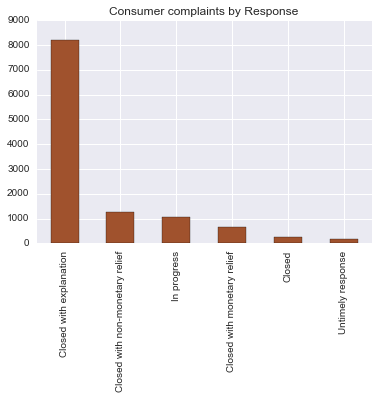

In [22]:
consumer_complaints['Company response'].value_counts().plot(kind='bar',color='sienna',title="Consumer complaints by Response")

In [13]:
new_series = consumer_complaints.pop('Date sent to company')

In [14]:
consumer_complaints.index = pd.to_datetime(new_series)

In [15]:
consumer_complaints['Weekday'] = consumer_complaints.index.to_series().map(lambda d: d.weekday())
consumer_complaints.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Company,Company response,Timely response?,Consumer disputed?,Weekday
Date sent to company,,,,,,,,,,,,,,
2014-12-31,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN,2
2014-12-31,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN,2
2014-12-31,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN,2
2014-12-31,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN,2
2014-12-31,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN,2


In [16]:
consumer_complaints.Weekday.mean()

1.9868318461405181

## Mean number of complaints by day of week

In [17]:
#consumer_complaints.groupby('Weekday').valuecount()

In [18]:
consumer_complaints['Weekday'].value_counts()

0    2609
2    2540
1    2450
4    1742
3    1449
5     429
6     324
Name: Weekday, dtype: int64

In [19]:
consumer_complaints[consumer_complaints['Weekday'] == 0]['Date received'].value_counts().mean()

84.161290322580641

In [20]:
avergage_consumer_complaints = []
for day in range(7):
    day_checker = consumer_complaints[consumer_complaints['Weekday'] == day]['Date received'].value_counts().mean()
    avergage_consumer_complaints.append(day_checker)

avergage_consumer_complaints 

[84.161290322580641,
 81.666666666666671,
 84.666666666666671,
 51.75,
 62.214285714285715,
 28.600000000000001,
 40.5]

<function matplotlib.pyplot.show>

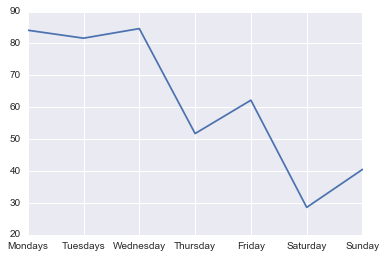

In [21]:
days = ["Mondays", "Tuesdays", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.plot(avergage_consumer_complaints)
plt.xticks(range(7), days)
plt.show

## Hump day is the worse day followed by Monday 

# Summary thoughts: 
    1.) pandas can do some cool stuff.
    2.) Complaints by type and company are a positive relationship.
    